In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importing Libraries


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Reading Dataset

In [3]:
df1 = pd.read_excel('C:\\Users\\ameyd\\Desktop\\IIITD\\SEM 5\\ML\\Project\\dataset\\jester-data-1.xls', header=None, index_col=None)
df2 = pd.read_excel('C:\\Users\\ameyd\\Desktop\\IIITD\\SEM 5\\ML\\Project\\dataset\\jester-data-2.xls', header=None, index_col=None)
df3 = pd.read_excel('C:\\Users\\ameyd\\Desktop\\IIITD\\SEM 5\\ML\\Project\\dataset\\jester-data-3.xls', header=None, index_col=None)


df  = pd.concat([df1, df2, df3], ignore_index=True)

In [4]:
print(df.shape)
# first_column_df = df.iloc[:, 0:1]
df = df.drop(df.columns[0], axis=1)

(73421, 101)


**Rounding the ratings to the closest integer**

In [5]:
# def round_half_up(x):
#     return int(x + 0.5) if x >= 0 else int(x - 0.5)
# df = df.map(round_half_up)

rounded_df = df.round(0).astype(int)

flat_data   = rounded_df.values.flatten()
flat_data   = flat_data.reshape(-1, 1)
print(f" Shape   : {flat_data.shape}")

filtered_data = flat_data[flat_data != 99]

print(f" Minimum : {min(filtered_data)}")
print(f" Maximum : {max(filtered_data)}")

 Shape   : (7342100, 1)
 Minimum : -10
 Maximum : 10


# Rating Distribution

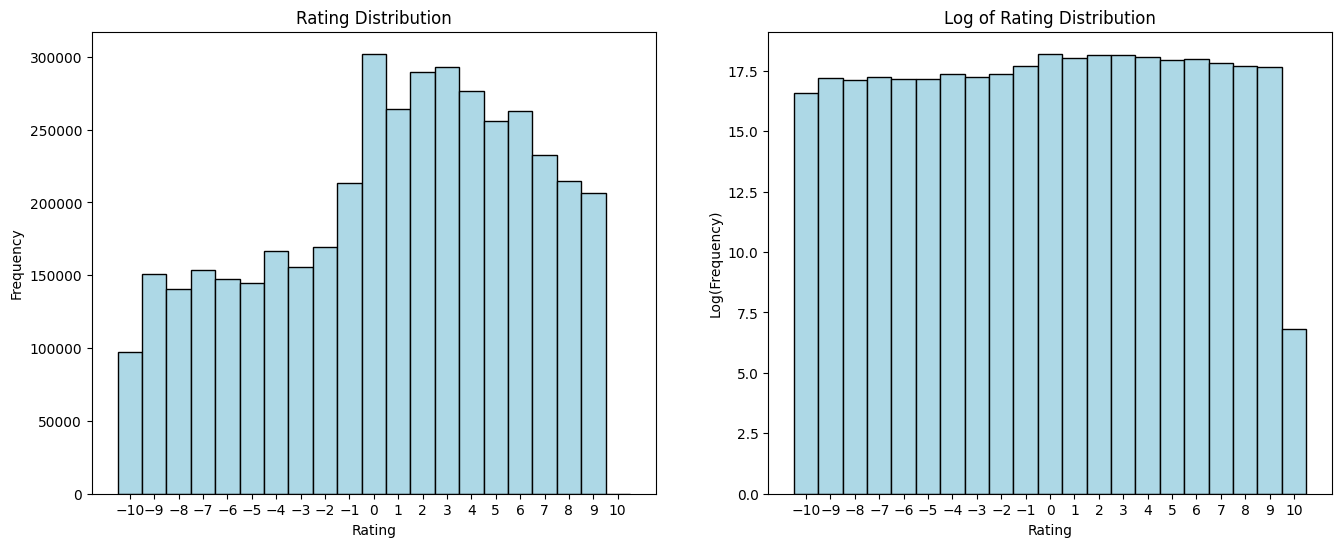

In [6]:
# plt.hist(filtered_data, bins=range(int(min(filtered_data)) - 1, int(max(filtered_data)) + 2), edgecolor='k')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.title('Rating distribution')
# plt.show()


custom_color = (173/255, 216/255, 230/255)

plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
plt.hist(filtered_data, bins=range(-10, 12), align='left', rwidth=1, color=custom_color, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.xticks(range(-10, 11))


plt.subplot(1, 2, 2)
ratings    = list(range(-10, 11))
counts     = [np.sum(filtered_data == r) for r in ratings]
log_counts = np.log2(np.array(counts))
plt.bar(ratings, log_counts, align='center', width=1, color=custom_color, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Log(Frequency)')
plt.title('Log of Rating Distribution')
plt.xticks(range(-10, 11))

plt.show()

# Number of Jokes Rated per User


In [7]:
'''
Too skewed
'''

# rated_jokes_counts = rounded_df.apply(lambda row: row[row != 99].count(), axis=1)

# plt.figure(figsize=(10, 6))
# plt.hist(rated_jokes_counts, bins=range(0, 101), align='left', rwidth=0.8, edgecolor='k')
# plt.xlabel('Number of Jokes Rated')
# plt.ylabel('Number of Users')
# plt.title('Distribution of Joke Ratings')
# plt.xticks(range(0, 101, 10))
# plt.show()

'\nToo skewed\n'

In [8]:
rated_jokes_counts = rounded_df.apply(lambda row: row[row != 99].count(), axis=1)

batch_size = 10
count_dict = {}

for count in rated_jokes_counts:
    batch_start = ((count - 1) // batch_size) * batch_size + 1
    batch_end   = batch_start + batch_size - 1
    batch_label = f"{batch_start}-{batch_end}"

    if batch_label in count_dict:
        count_dict[batch_label] += 1
    else:
        count_dict[batch_label] = 1


count_dict = collections.OrderedDict(sorted(count_dict.items()))

for batch, frequency in count_dict.items():
    print(f"Number of users with {batch:<6} rated jokes: {frequency}")

Number of users with 11-20  rated jokes: 7321
Number of users with 21-30  rated jokes: 12491
Number of users with 31-40  rated jokes: 9263
Number of users with 41-50  rated jokes: 6807
Number of users with 51-60  rated jokes: 4614
Number of users with 61-70  rated jokes: 4238
Number of users with 71-80  rated jokes: 11894
Number of users with 81-90  rated jokes: 1519
Number of users with 91-100 rated jokes: 15274


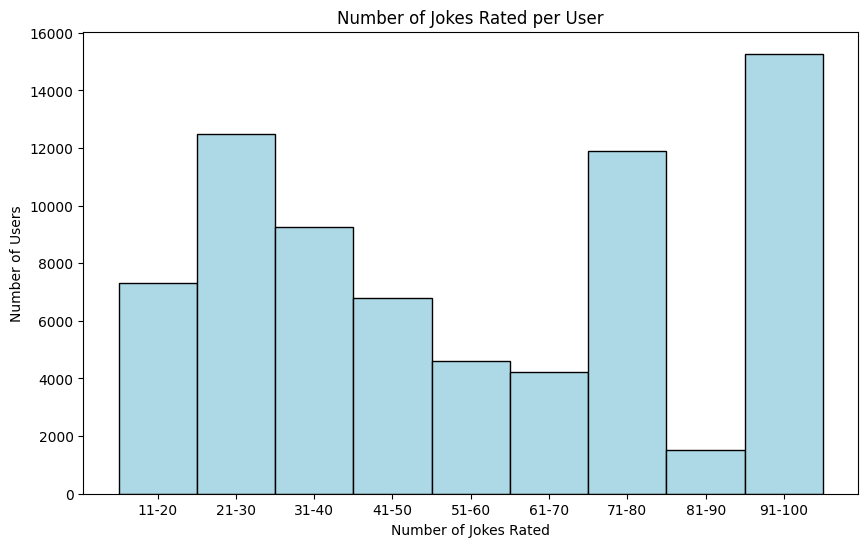

In [9]:
sorted_batches  = sorted(count_dict.items())
batches, counts = zip(*sorted_batches)

plt.figure(figsize=(10, 6))
plt.bar(batches, counts, align='center', width=1, color=custom_color, edgecolor='k')
plt.xlabel('Number of Jokes Rated')
plt.ylabel('Number of Users')
plt.title('Number of Jokes Rated per User')
plt.show()

# Number of Users who Rated the Joke

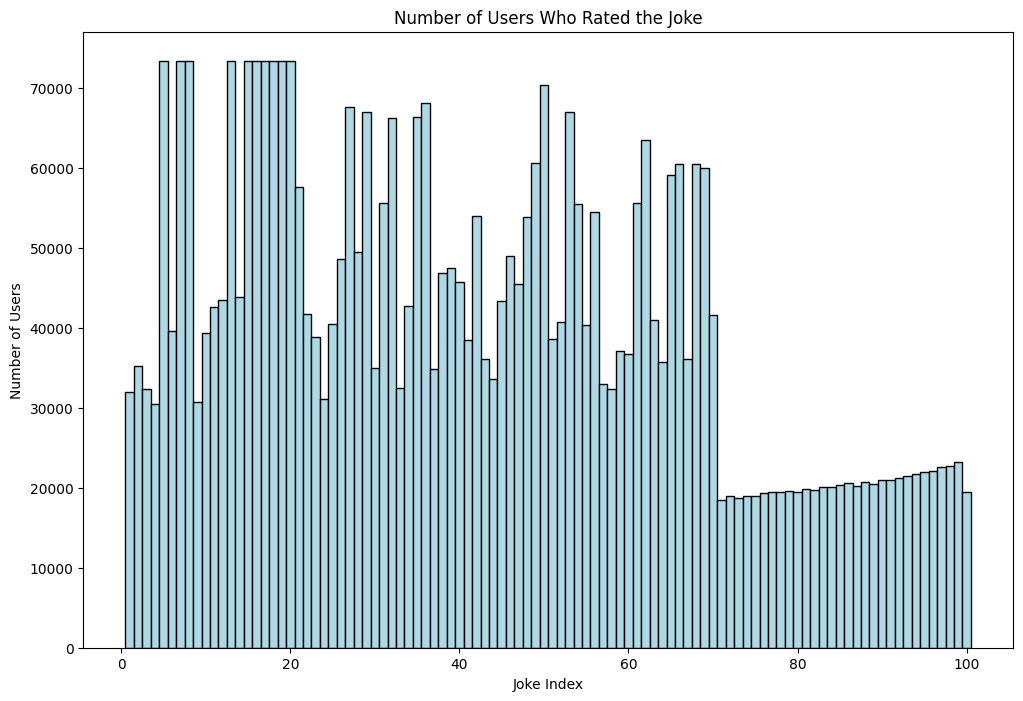

In [10]:
rated_users_count = []

for col in rounded_df.columns:
    rated_users = rounded_df[rounded_df[col] != 99][col].count()
    rated_users_count.append(rated_users)


plt.figure(figsize=(12, 8))
plt.bar(rounded_df.columns, rated_users_count, align='center', width=1, color=custom_color, edgecolor='k')
plt.title("Number of Users Who Rated the Joke")
plt.xlabel('Joke Index')
plt.ylabel('Number of Users')
plt.show()

# Average Rating for each Joke


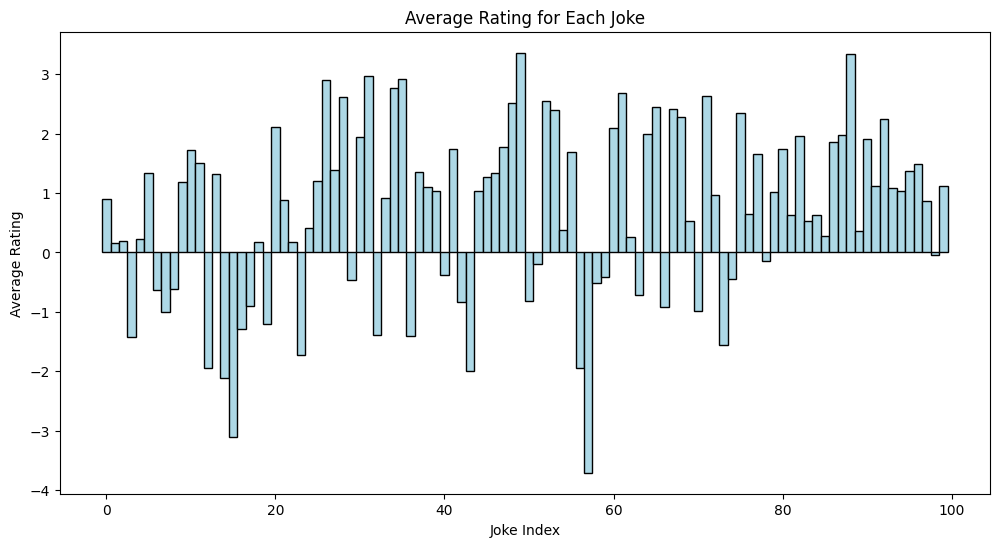

In [11]:
average_ratings = rounded_df[rounded_df != 99].mean()
joke_indices = range(len(average_ratings))


plt.figure(figsize=(12, 6))
plt.bar(joke_indices, average_ratings, align='center', width=1, color=custom_color, edgecolor='k')
plt.title("Average Rating for Each Joke")
plt.xlabel('Joke Index')
plt.ylabel('Average Rating')
plt.show()

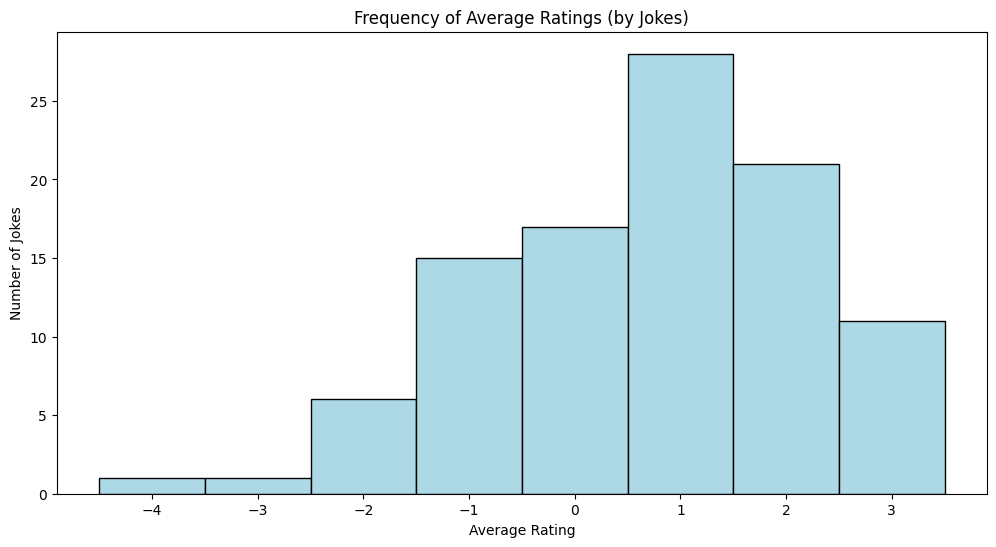

In [12]:
rounded_ratings = average_ratings.round().astype(int)
frequency = rounded_ratings.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(frequency.index, frequency.values, align='center', width=1, color=custom_color, edgecolor='k')
plt.title("Frequency of Average Ratings (by Jokes)")
plt.xlabel('Average Rating')
plt.ylabel('Number of Jokes')
plt.show()

# Average Rating by each User

Text(0, 0.5, 'Frequency')

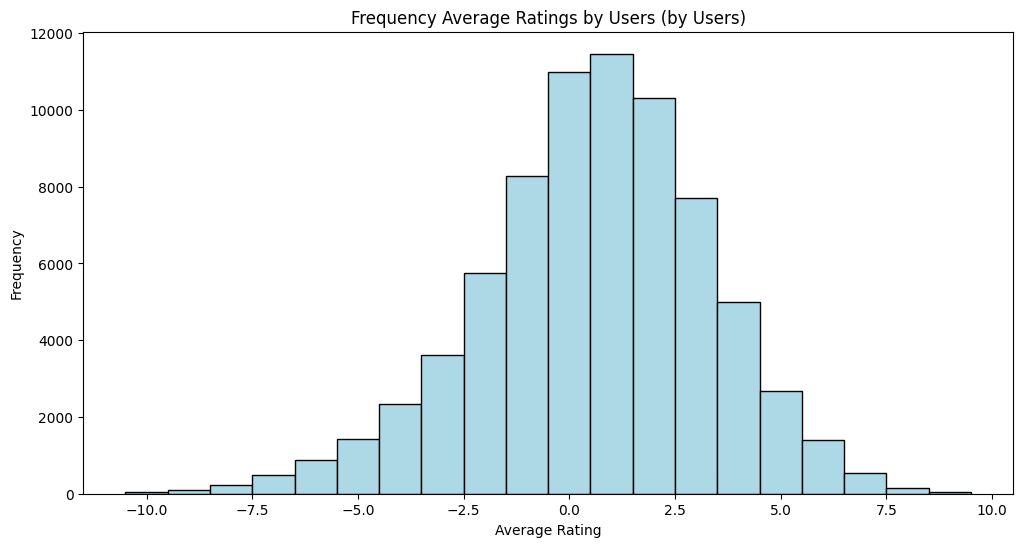

In [13]:
average_ratings_by_user = rounded_df[rounded_df != 99].mean(axis=1)

rounded_ratings_by_user = average_ratings_by_user.round().astype(int)
frequency = rounded_ratings_by_user.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(frequency.index, frequency.values, align='center', width=1, color=custom_color, edgecolor='k')
plt.title("Frequency Average Ratings by Users (by Users)")
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

# Normalizing 1
[Relevant Paper](https://downloads.hindawi.com/journals/complexity/2022/6958596.pdf)

In [14]:
# def normalize_cell(x):
#     return ( x - (-10) ) / ( 10 - (-10) ) if x!=99 else 99

# normalized_df = df.map(normalize_cell)
# normalized_df = normalized_df.replace(99, 0)

# Normalizing 2
[Relevant Video]( https://www.youtube.com/playlist?list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV )

In [15]:
def replace_99_with_nan(x):
    return x.replace(99, np.nan)

def subtract_mean_from_row(row):
    row_mean = row.mean()
    return row - row_mean

def replace_nan_with_0(x):
    return x.fillna(0)

normalized_df = df.apply(replace_99_with_nan)
normalized_df = normalized_df.apply(subtract_mean_from_row, axis=1)
normalized_df = normalized_df.apply(replace_nan_with_0)

# Normalizing 3
[Relevant Paper]( https://eigentaste.berkeley.edu/about.html )

In [16]:
# def replace_99_with_nan(x):
#     return x.replace(99, np.nan)

# def subtract_mean_from_row_and_divide_by_stadard_deviation(row):
#     row_mean = row.mean()
#     row_std  = row.std()
#     return (row - row_mean)/row_std

# def replace_nan_with_0(x):
#     return x.fillna(0)

# normalized_df = df.apply(replace_99_with_nan)
# normalized_df = normalized_df.apply(subtract_mean_from_row_and_divide_by_stadard_deviation, axis=1)
# normalized_df = normalized_df.apply(replace_nan_with_0)

# Similarity Matrix 1
MemoryError

In [17]:
# n_users = len(normalized_df)
# similarity_matrix = pd.DataFrame(np.zeros((n_users, n_users)))


# def similarity_function(user1, user2):
#     squared_distance = np.sum((user1 - user2) ** 2)
#     return -squared_distance


# for i in range(n_users):
#     for k in range(i + 1, n_users):
#         similarity = similarity_function(normalized_df.iloc[i], normalized_df.iloc[k])
#         similarity_matrix.iloc[i, k] = similarity
#         similarity_matrix.iloc[k, i] = similarity

# similarity_matrix

# Similarity Matrix 2
considers **jester-data-1.xls**

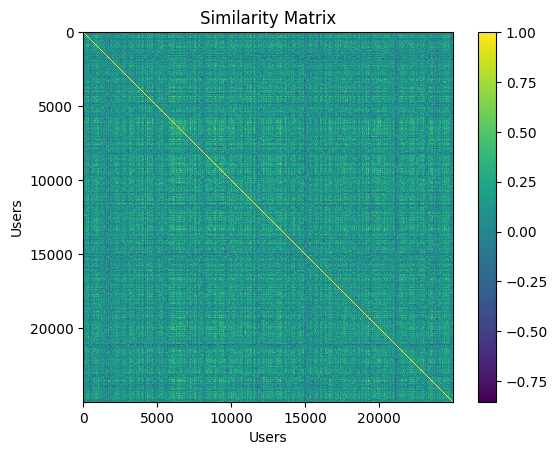

In [37]:
altered_df1 = df1.drop(df1.columns[0], axis=1)



# normalized_df1 = df1.map(normalize_cell)
# normalized_df1 = normalized_df1.replace(99, 0)

normalized_df1 = altered_df1.apply(replace_99_with_nan)
normalized_df1 = normalized_df1.apply(subtract_mean_from_row, axis=1)
normalized_df1 = normalized_df1.apply(replace_nan_with_0)

# normalized_df1 = df1.apply(replace_99_with_nan)
# normalized_df1 = normalized_df1.apply(subtract_mean_from_row_and_divide_by_stadard_deviation, axis=1)
# normalized_df1 = normalized_df1.apply(replace_nan_with_0)



batch_size = 1000

num_samples = normalized_df1.shape[0]
cosine_similarity_matrix = np.zeros((num_samples, num_samples))

for i in range(0, num_samples, batch_size):
    batch_data = normalized_df1[i:i+batch_size]
    similarity_batch = cosine_similarity(batch_data, normalized_df1)
    cosine_similarity_matrix[i:i+batch_size, :] = similarity_batch


plt.imshow(cosine_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Similarity Matrix')
plt.xlabel('Users')
plt.ylabel('Users')
plt.show()

# Pearson Correlation
[Relevant Paper]( https://eigentaste.berkeley.edu/about.html )

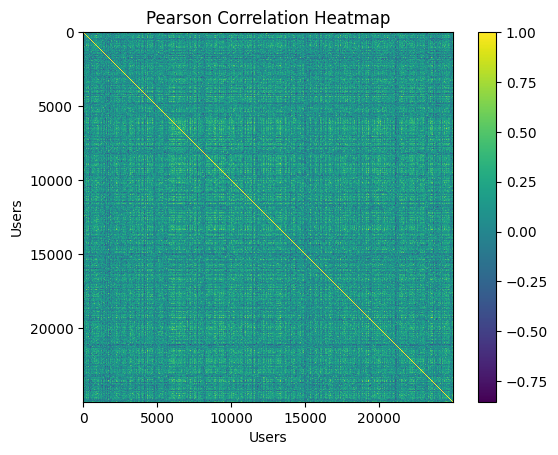

In [38]:
altered_df1 = df1.drop(df1.columns[0], axis=1)



# normalized_df1 = df1.map(normalize_cell)
# normalized_df1 = normalized_df1.replace(99, 0)

normalized_df1 = altered_df1.apply(replace_99_with_nan)
normalized_df1 = normalized_df1.apply(subtract_mean_from_row, axis=1)
normalized_df1 = normalized_df1.apply(replace_nan_with_0)

# normalized_df1 = df1.apply(replace_99_with_nan)
# normalized_df1 = normalized_df1.apply(subtract_mean_from_row_and_divide_by_stadard_deviation, axis=1)
# normalized_df1 = normalized_df1.apply(replace_nan_with_0)



# def pearson_correlation(x, y):
#     mean_x = np.mean(x)
#     mean_y = np.mean(y)
#     s_xy = sum((x - mean_x) * (y - mean_y))
#     s_x = np.sqrt(sum((x - mean_x)**2))
#     s_y = np.sqrt(sum((y - mean_y)**2))
#     return s_xy / (s_x * s_y)

# num_samples = normalized_df1.shape[0]
# correlation_matrix = np.zeros((num_samples, num_samples))

# for i in range(num_samples):
#     for j in range(num_samples):
#         correlation_matrix[i, j] = pearson_correlation(normalized_df1.iloc[i], normalized_df1.iloc[j])

correlation_matrix = np.corrcoef(normalized_df1, rowvar=True)


plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Pearson Correlation Heatmap')
plt.xlabel('Users')
plt.ylabel('Users')
plt.show()

# Post Normalization EDA

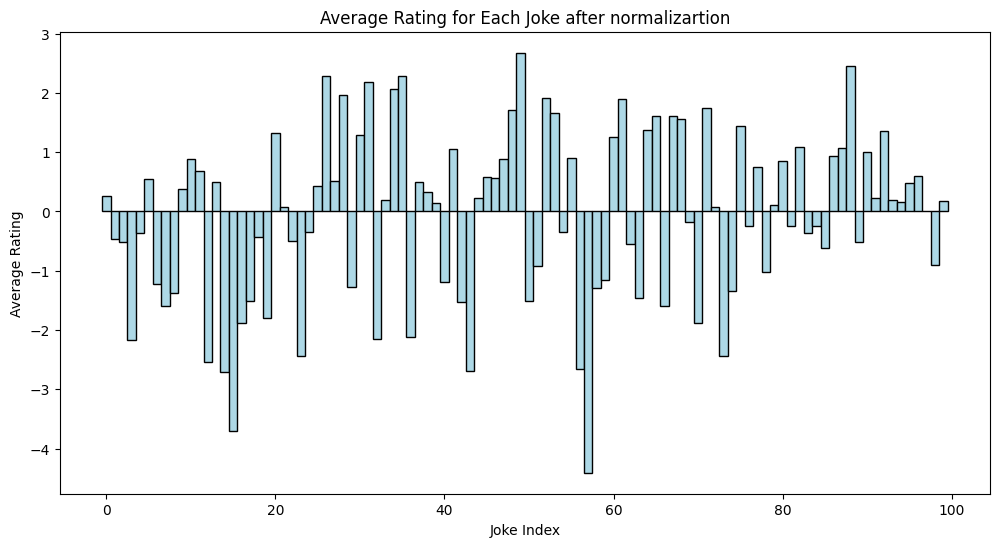

In [20]:
average_ratings2 = normalized_df[normalized_df != 0].mean()
joke_indices = range(len(average_ratings2))


plt.figure(figsize=(12, 6))
plt.bar(joke_indices, average_ratings2, align='center', width=1, color=custom_color, edgecolor='k')
plt.title("Average Rating for Each Joke after normalizartion")
plt.xlabel('Joke Index')
plt.ylabel('Average Rating')
plt.show()

# PCA

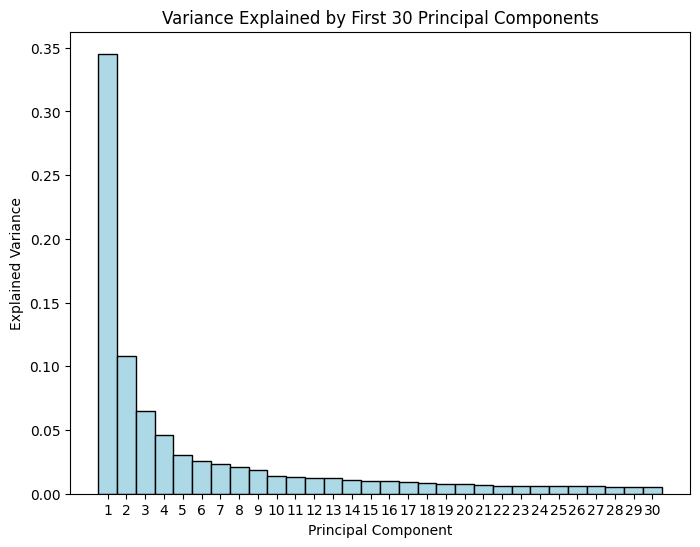

In [35]:
cosine_similarity_matrix = cosine_similarity_matrix.astype(np.float32)


pca = PCA()
pca.fit(cosine_similarity_matrix)
explained_variance = pca.explained_variance_ratio_[:30]


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, align='center', width=1, color=custom_color, edgecolor='k')
plt.title('Variance Explained by First 30 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [33]:
n = 30
explained_variance = pca.explained_variance_ratio_[:n]
print(f"Variance explained by {n} components : {sum(explained_variance)*100:.2f}%")

Variance explained by 30 components : 85.77%
